In [1]:
## Image processing - Juan V.
# ------- IMPORTS --------
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
# ------------------------ 

# For aesthetic plots
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

import skimage as sk 
from skimage import io, morphology, feature 
from skimage import color, restoration

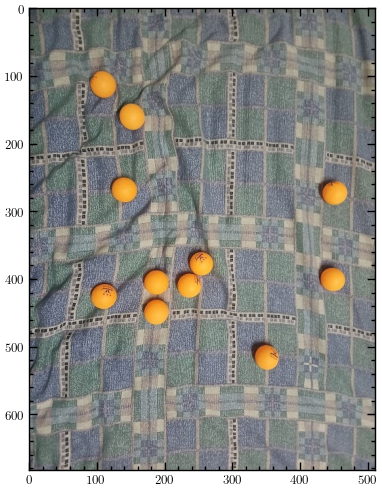

In [2]:
pingpong = sk.io.imread('PingPong.jpg')
plt.grid()
plt.imshow(pingpong)


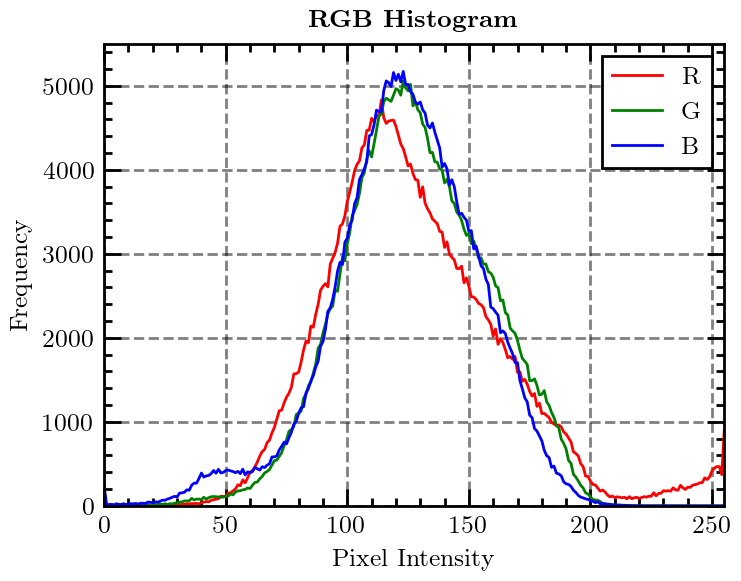

In [3]:

colors = ('r', 'g', 'b')
plt.figure(figsize = (4, 3), dpi = 200)
for i, color in enumerate(colors):
    hist, bins = np.histogram(pingpong[:,:, i].ravel(), bins=256, range=(0, 256))
    plt.plot(bins[:-1], hist, color=color, linewidth = 1,  label = color.upper())

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title(r'\textbf{RGB Histogram}')
plt.xlim(0,255)
plt.ylim(0,5500)
plt.legend(loc = 'upper right')
plt.show()

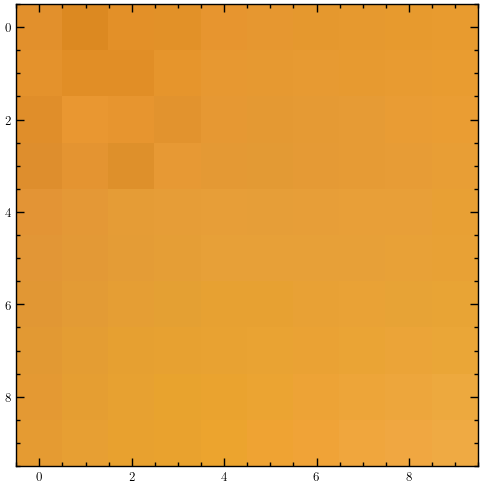

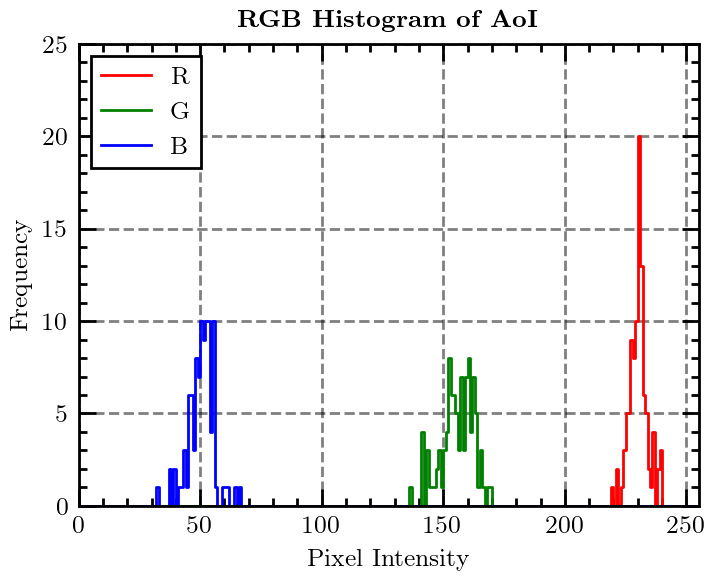

In [4]:
pingpong_smol = pingpong[100:110,100:110,:]
plt.grid()
plt.imshow(pingpong_smol)

plt.figure(figsize = (4, 3), dpi = 200)
for i, color in enumerate(colors):
    hist, bins = np.histogram(pingpong_smol[:,:, i].ravel(), bins=256, range=(0, 256))
    plt.step(bins[:-1], hist, color=color, linewidth = 1,  label = color.upper())

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title(r'\textbf{RGB Histogram of AoI}')
plt.xlim(0,255)
plt.ylim(0,25)
plt.legend(loc = 'upper left')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28385155713725496..0.8587254901960784].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28385155713725496..0.8587254901960784].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28385155713725496..0.8587254901960784].


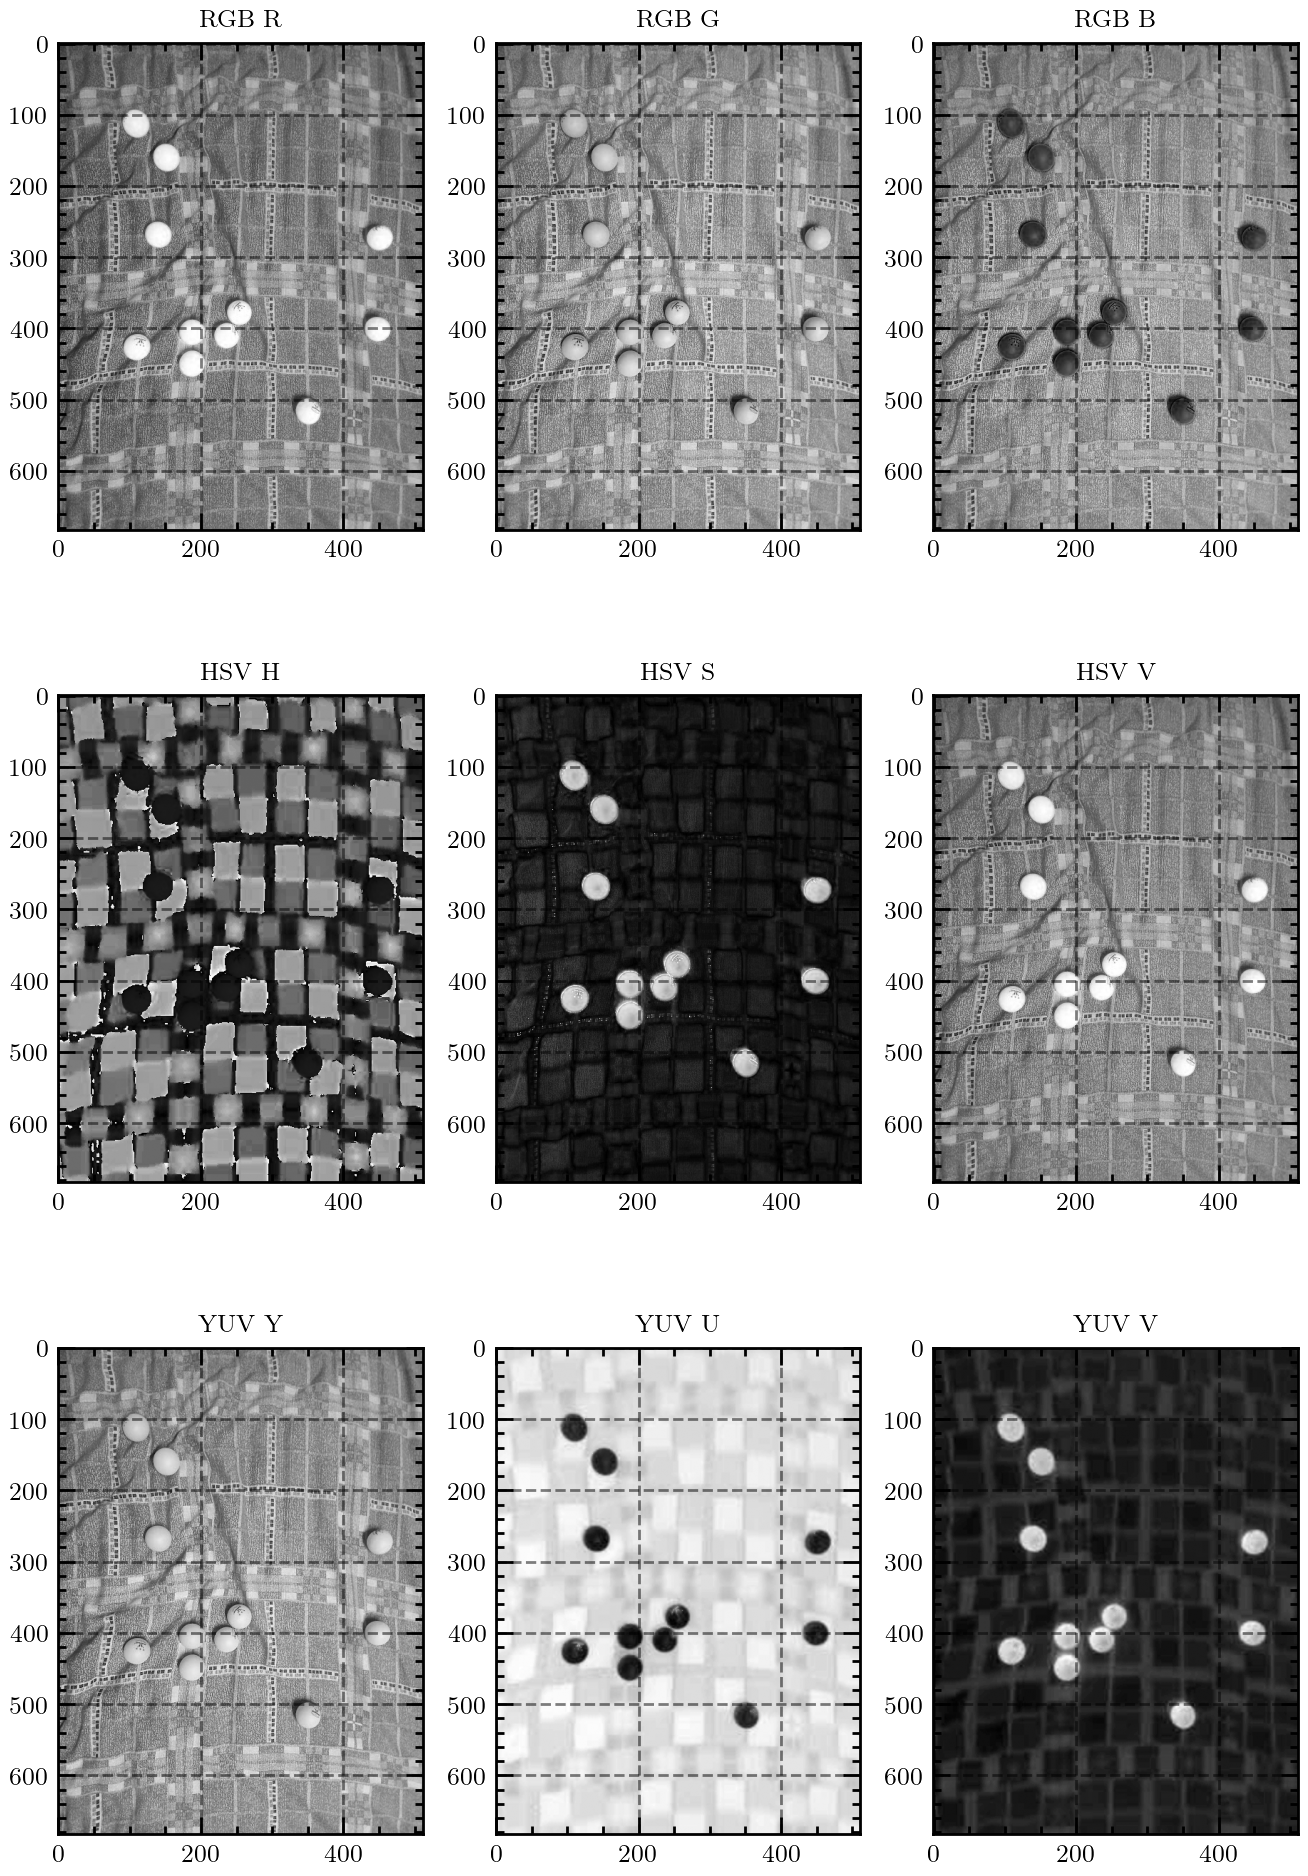

In [ ]:
# Convert to HSV and YUV
hsv_image = sk.color.rgb2hsv(pingpong)
yuv_image = sk.color.rgb2yuv(pingpong)

# Plot images
fig, axes = plt.subplots(3, 3, figsize=(8, 12), dpi = 200)
modes = [pingpong, hsv_image, yuv_image]
colors_og = ['r', 'g', 'b']
colors_hsv = ['h', 's', 'v']
colors_yuv = ['y', 'u', 'v']
title = ['RGB Image', 'HSV Image', 'YUV Image']

axes[0][0].imshow(pingpong[:,:,0], cmap = 'gray')
axes[0][0].set_title('RGB R')
axes[0][1].imshow(pingpong[:,:,1], cmap = 'gray')
axes[0][1].set_title('RGB G')
axes[0][2].imshow(pingpong[:,:,2], cmap = 'gray')
axes[0][2].set_title('RGB B')

axes[1][0].imshow(hsv_image[:,:,0], cmap = 'gray')
axes[1][0].set_title('HSV H')
axes[1][1].imshow(hsv_image[:,:,1], cmap = 'gray')
axes[1][1].set_title('HSV S')
axes[1][2].imshow(hsv_image[:,:,2], cmap = 'gray')
axes[1][2].set_title('HSV V')

axes[2][0].imshow(yuv_image[:,:,0], cmap = 'gray')
axes[2][0].set_title('YUV Y')
axes[2][1].imshow(yuv_image[:,:,1], cmap = 'gray')
axes[2][1].set_title('YUV U')
axes[2][2].imshow(yuv_image[:,:,2], cmap = 'gray')
axes[2][2].set_title('YUV V')

plt.show()


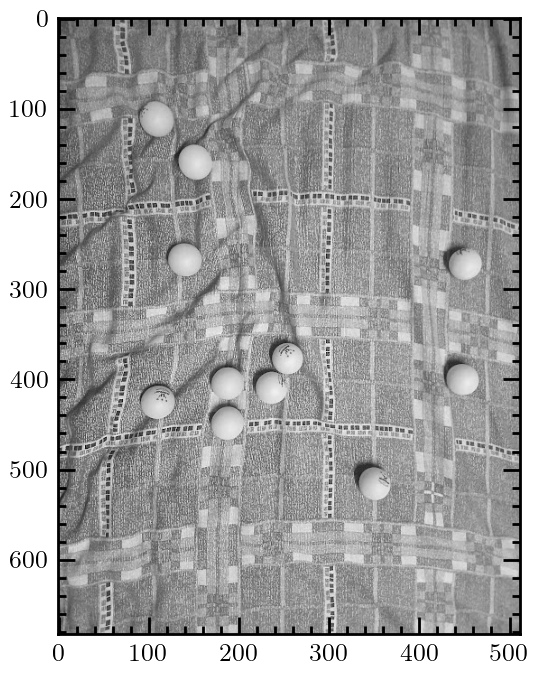

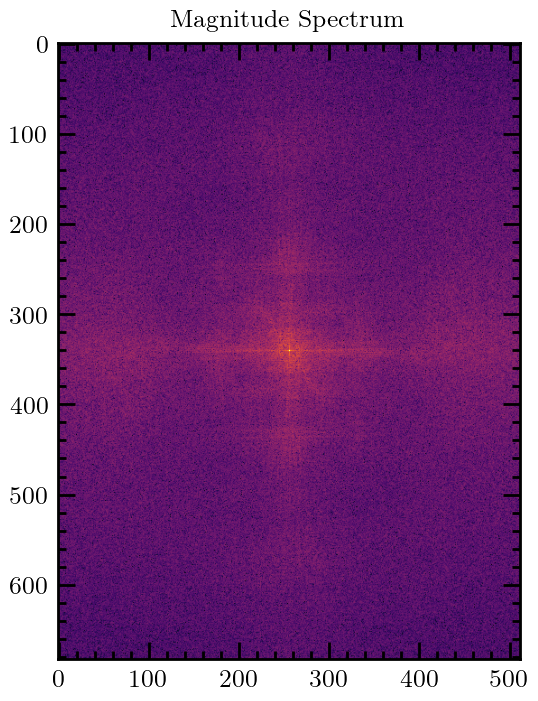

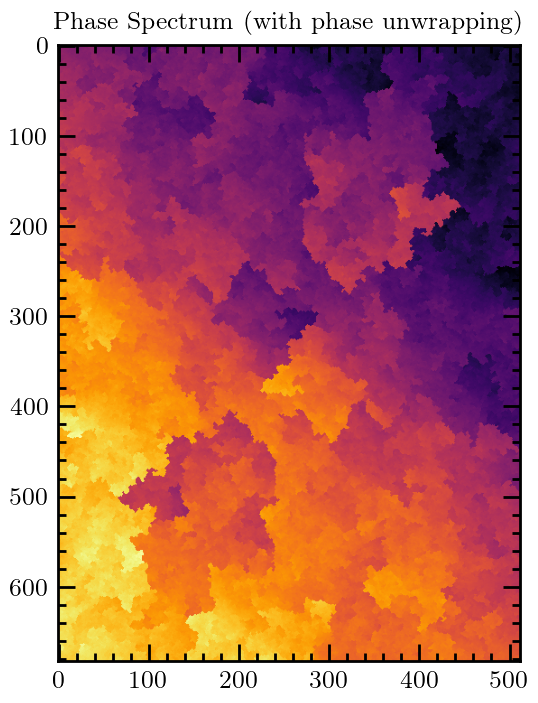

In [6]:
pingpong_gray = sk.color.rgb2gray(pingpong)
plt.figure(figsize = (3,4), dpi = 200)
plt.grid()
plt.imshow(pingpong_gray, cmap = 'gray')

# Compute 2D FFT
fft_image = np.fft.fft2(pingpong_gray)
fft_image_shifted = np.fft.fftshift(fft_image)

# Get magnitude spectrum
magnitude_spectrum = np.log(1+np.abs(fft_image_shifted))
# phase unwraping

# Plot the fucker
plt.figure(figsize = (3,4), dpi = 200)
plt.imshow(magnitude_spectrum, cmap='inferno')
plt.title('Magnitude Spectrum')
plt.grid()
plt.show()

# Plot phase spectrum 
phase_spectrum = np.angle(fft_image_shifted)
plt.figure(figsize = (3,4), dpi = 200)
phase_spectrum_unwrap = sk.restoration.unwrap_phase(np.fft.fftshift(phase_spectrum))
plt.imshow(phase_spectrum_unwrap, cmap='inferno')
plt.title('Phase  Spectrum (with phase unwrapping)')
plt.grid()
plt.show()


In [7]:
# using 2 different process, identify the pixel position, center of pingpong ball
# annotiate the fucker

# thresholding (binarized) + morphological operations

# correlation with ROI
# convolution and correlation

Blob 1: Center of Mass = (108.6474,112.6886)
Blob 2: Center of Mass = (151.1716,160.1179)
Blob 3: Center of Mass = (139.5063,267.6481)
Blob 4: Center of Mass = (449.5494,273.0288)
Blob 5: Center of Mass = (253.0918,379.4392)
Blob 6: Center of Mass = (446.4979,399.9665)
Blob 7: Center of Mass = (186.9873,404.6311)
Blob 8: Center of Mass = (235.1347,408.6433)
Blob 9: Center of Mass = (108.3021,426.9954)
Blob 10: Center of Mass = (186.5573,446.9333)
Blob 11: Center of Mass = (349.3285,515.0187)


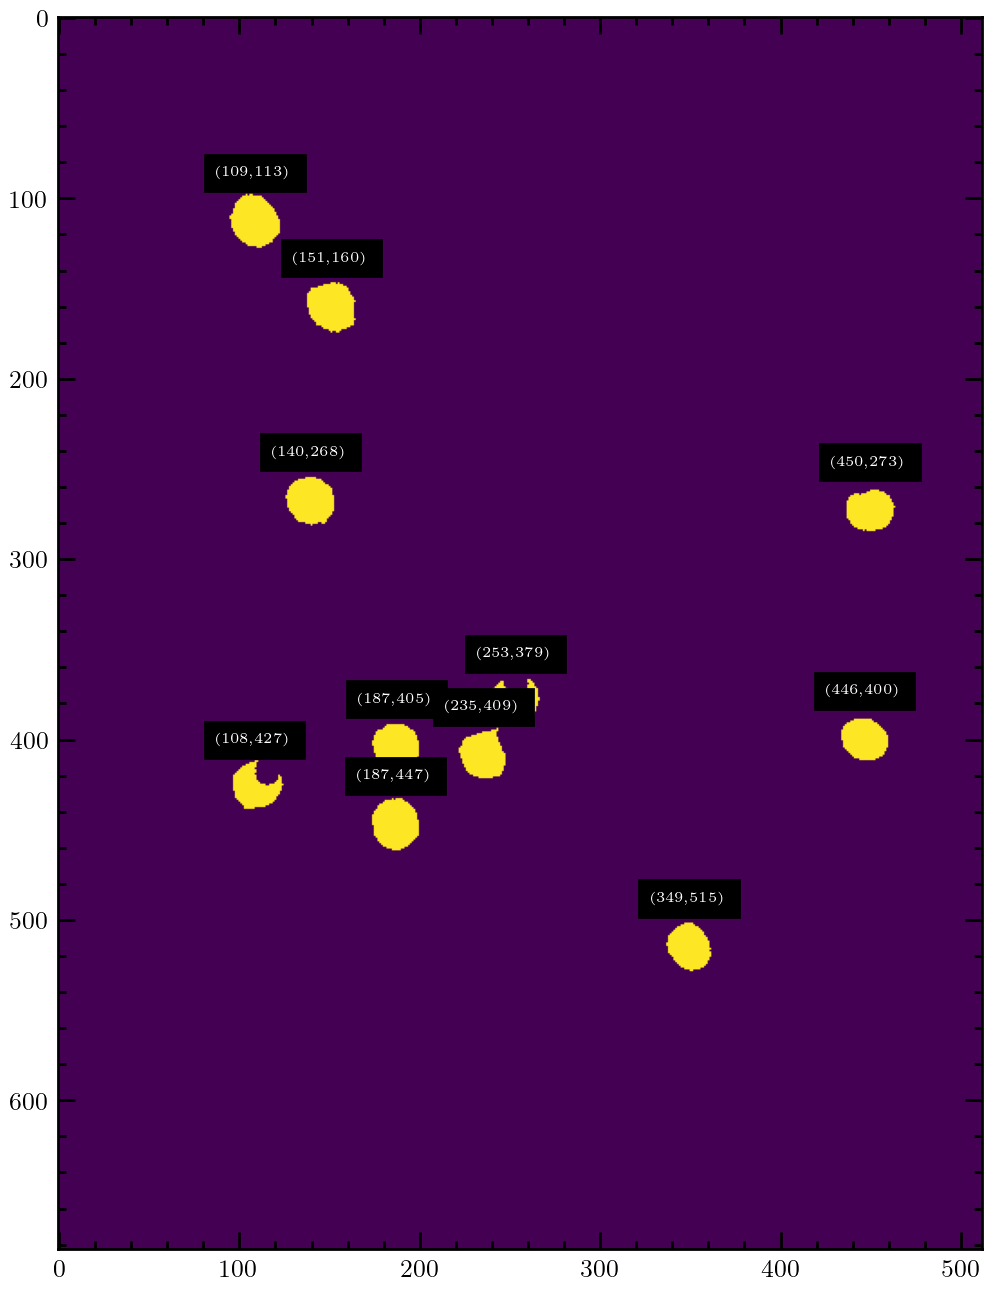

In [8]:
# thresholding
pingpong_threshold = hsv_image[:,:,1]
binary_mask = np.where(pingpong_threshold > 0.5, 1, 0)

# Kernel to check neighbors
kernel = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]])

# Count neighbors
neighbors = sp.ndimage.convolve(binary_mask, kernel, mode='constant', cval=0)

# Remove isolated 1s
binary_mask[(binary_mask == 1) & (neighbors < 1)] = 0
binary_mask = sk.morphology.erosion(binary_mask, sk.morphology.disk(6))
# # Convert 0s with at least 1 neighboring 1 to 1
# binary_mask[(binary_mask == 0) & (neighbors > 0)] = 1
plt.figure(figsize=(6,8), dpi = 200)
plt.grid()
plt.imshow(binary_mask, cmap = 'viridis')

# Label each blob
labeled_array = sk.measure.label(binary_mask)

# Get center of mass
for region in sk.measure.regionprops(labeled_array):
    y, x = region.centroid
    print(f"Blob {region.label}: Center of Mass = ({x:.4f},{y:.4f})")
    plt.text(x, y-25, f'({x:.0f},{y:.0f})', color='white', fontsize=5, ha='center', backgroundcolor = 'k')

    

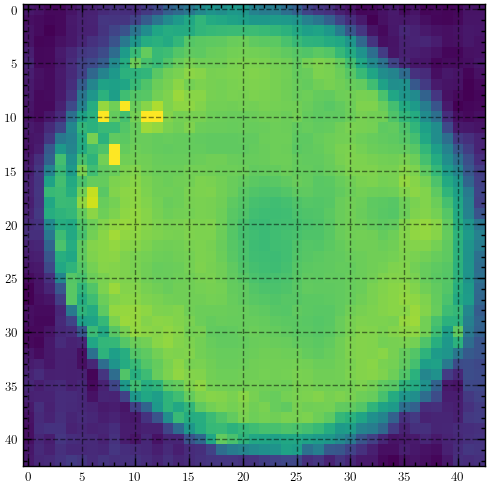

In [9]:
## corellation with ROI
roi = hsv_image[92:135,87:130, 1]
img = hsv_image[:,:, 1]
plt.imshow(roi)

(43, 43)
(683, 512)


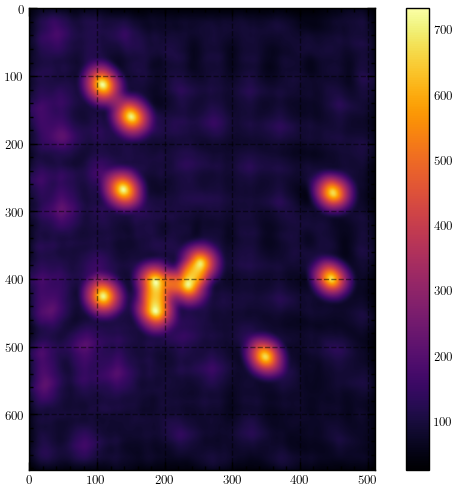

In [10]:
correl = sp.signal.correlate2d(img, roi, mode='same')
print(roi.shape)
print(img.shape)
plt.imshow(correl, cmap = 'inferno')
plt.colorbar()
plt.show()


Blob 1: Center of Mass = (108.1200,112.9600)
Blob 2: Center of Mass = (150.4932,160.1370)
Blob 3: Center of Mass = (138.7959,268.0000)
Blob 4: Center of Mass = (448.2188,272.7812)
Blob 5: Center of Mass = (250.7982,380.1404)
Blob 6: Center of Mass = (235.7791,405.2945)
Blob 7: Center of Mass = (445.8095,399.9524)
Blob 8: Center of Mass = (186.6310,408.1604)
Blob 9: Center of Mass = (109.0633,425.5063)
Blob 10: Center of Mass = (186.1475,442.8756)
Blob 11: Center of Mass = (348.2400,515.0400)


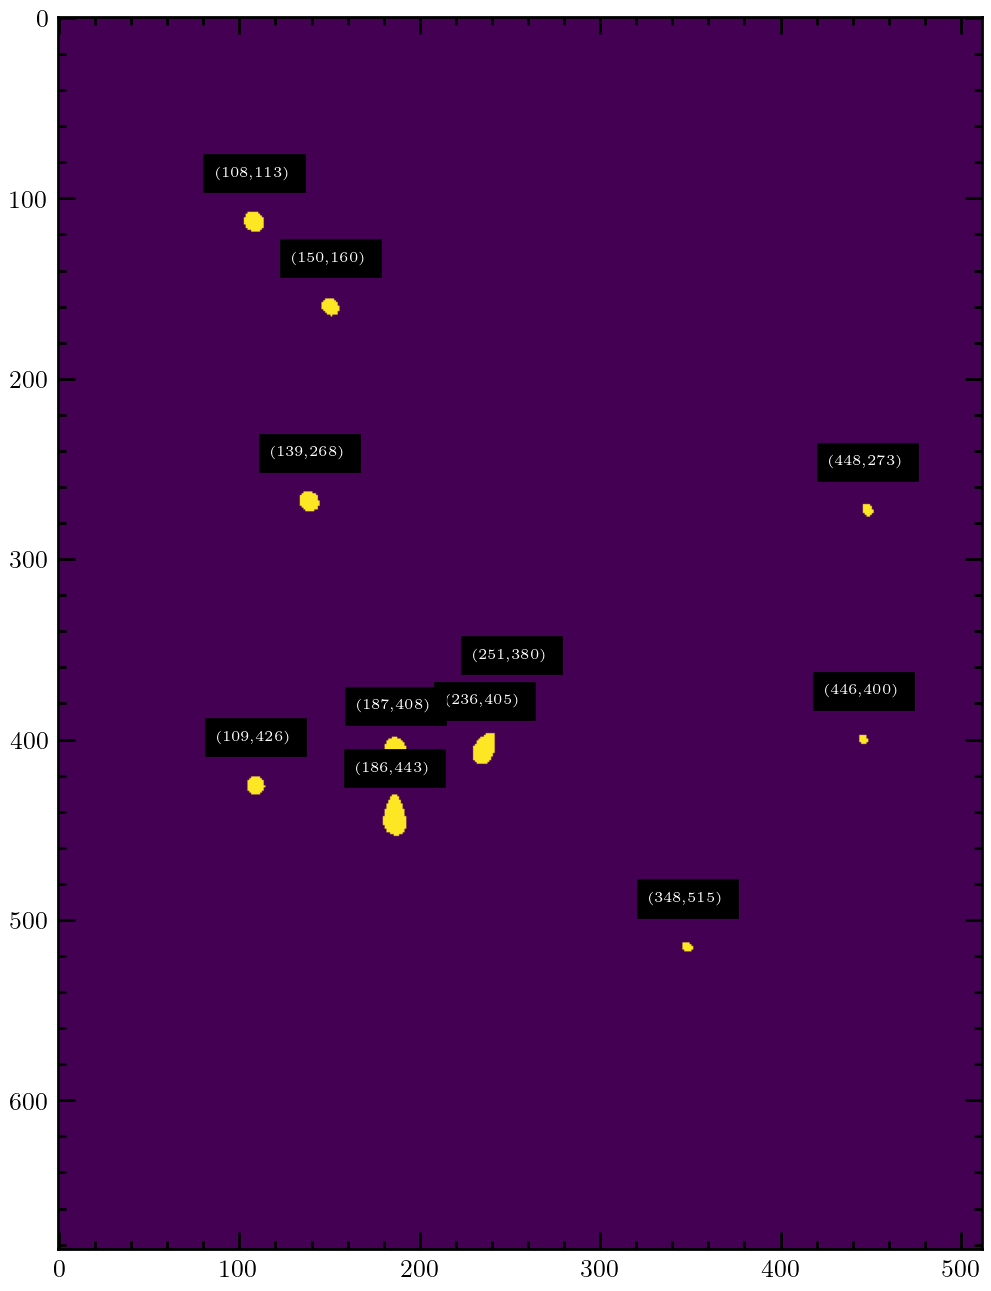

In [11]:
correl_thresh = correl > 650
plt.figure(figsize=(6,8), dpi = 200)
plt.grid()
plt.imshow(correl_thresh, cmap = 'viridis')

# Label each blob
labeled_array = sk.measure.label(correl_thresh)

# Get center of mass
for region in sk.measure.regionprops(labeled_array):
    y, x = region.centroid
    print(f"Blob {region.label}: Center of Mass = ({x:.4f},{y:.4f})")
    plt.text(x, y-25, f'({x:.0f},{y:.0f})', color='white', fontsize=5, ha='center', backgroundcolor = 'k')



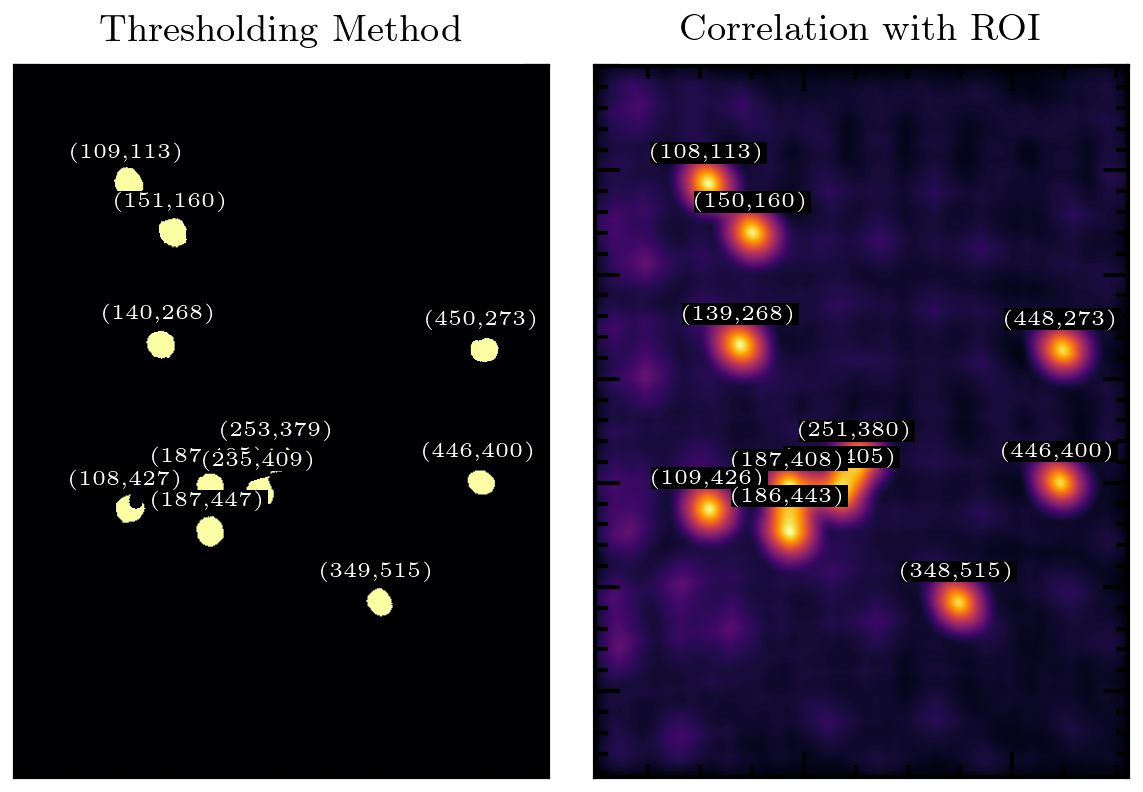

In [ ]:
## IMAGE PROCESSING:
    # LABEL THE PINGPONG BALLS
# load the image
pingpong    = sk.io.imread('PingPong.jpg')
# get the hsv channel
pingpong_hsv = sk.color.rgb2hsv(pingpong)
# get the saturation (has maximal contrast)
pingpong_s = pingpong_hsv[:,:,1]


def label_blobs(image, ax):
    # Label each blob
    labeled_array = sk.measure.label(image)
    # Get center of mass and label the image
    for region in sk.measure.regionprops(labeled_array):
        y, x = region.centroid
        axes[ax].text(
            x, 
            y-25, 
            f'({x:.0f},{y:.0f})', 
            color='white', 
            fontsize=5, 
            ha='center',  
            bbox=dict(
                facecolor='k', 
                edgecolor='none', 
                pad=0.1
                )
            )

## Thresholding
pingpong_threshold = pingpong_s[:,:]
binary_mask = np.where(pingpong_threshold > 0.5, 3, 0)
# Kernel to check neighbors
kernel = np.array([[1,1,1], [1,0,1], [1,1,1]])
# Count neighbors
neighbors = sp.ndimage.convolve(binary_mask, kernel, mode='constant', cval=0)
# Remove isolated 1s because it messes up the data
binary_mask[(binary_mask == 1) & (neighbors < 1)] = 0
# erode to remove things and stuff
blobs_threshold = sk.morphology.erosion(binary_mask, sk.morphology.disk(6))

## Correlation
roi = pingpong_s[92:135,87:130] # region of interest
img = pingpong_s[:,:]           # image
correl = sp.signal.correlate2d(
    img, 
    roi, 
    mode='same'
) # correlating the roi to the rest of the image
correl_threshold = correl > 650 # thresholding

fig, axes = plt.subplots(
    ncols = 2, 
    nrows = 1, 
    figsize=(4,4), 
    dpi = 300
)
cmapp = 'inferno'
axes[0].imshow(blobs_threshold, cmap = cmapp)
axes[0].set_title('Thresholding Method', fontsize = 9)
label_blobs(blobs_threshold, 0)
axes[1].imshow(correl, cmap = cmapp)
axes[1].set_title('Correlation with ROI', fontsize = 9)
label_blobs(correl_threshold,1)
for ax in axes:
    ax.tick_params(
        labelleft=False, 
        labelbottom=False
    )
    ax.grid()
plt.tight_layout()
plt.show()
